#HOA 6.2

In this set of activities, you will experiment with applying different *filters* to an image. The grayscale and negative image transformations from the first part of this chapter are examples of filters. Here, you will create some more. 

---

##1. Prepare Yourself

To get ready for making additional filters, exeucte the following three cells. The first cell imports the required modules and defines the `makePixel()` and `makeBlackImage()` functions we are using in this module.


In [ ]:
# modules needed to use Scikit-learn image processing in Colab
import skimage.io
from matplotlib import pyplot as plt
import numpy as np

def makePixel(r, g, b):
  """
  Make a RGB pixel suitable for a Scikit-learn image.

  parameters
  ----------
  r : int
    red intensity, in [0, 255]
  g : int
    green intensity, in [0, 255]
  b : int
    blue intensity, in [0, 255]

  returns
  -------
    A pixel with the specified color. 
  """

  pixel = np.ndarray((3,), dtype='uint8')  
  pixel[0] = np.uint8(r)
  pixel[1] = np.uint8(g)
  pixel[2] = np.uint8(b)

  return pixel

def makeBlackImage(shape):
  """
  Make and return a black RGB image of the specified shape.

  parameters
  ----------
  shape : tuple
    shape of the image (rows, cols, channels)

  returns
  -------
    A black Scikit-learn image of the specified size.
  """
  newImg = np.zeros(shape, dtype='uint8')

  return newImg

The next cell defines the `negativePixel()` function you saw in the first part of this module. The filters you create below will be similar to this function.

In [ ]:
def negativePixel(oldPixel):
  """
  Invert and return a RGB pixel.
  
  parameters
  ----------
  oldPixel : 1x3 uint8 NumPy array
    Red, green, blue pixel intensities of the pixel

  returns
  -------
    New, negated pixel
  """
  newRed = 255 - oldPixel[0]
  newGreen = 255 - oldPixel[1]
  newBlue = 255 - oldPixel[2]

  newPixel = makePixel(newRed, newGreen, newBlue)

  return newPixel

Finally, the third cell defines the `pixelMapper()` function. You will use this function to apply the different filters you create.

In [ ]:
def pixelMapper(fileImage, rgbFunction):
  """
  Apply the specified RGB transformation to each pixel in an image, and return
  as a new image.

  parameters
  ----------
  fileImage : 3-dimensional uint8 NumPy array
    The original image
  rgbFunction : function
    Transformation function to be applied to each pixel

  returns
  -------
    New, transformed image.
  """
  newIm = makeBlackImage(fileImage.shape)

  for row in range(fileImage.shape[0]):
    for col in range(fileImage.shape[1]):
      newIm[row][col] = rgbFunction(fileImage[row][col])

  return newIm

---

##2. Seeing (No) Red

Now you will write your first new filter! This filter should take a pixel, remove its red component, and return the new pixel. 

For example, if a pixel object named `pixel` has these color intensities,

```
array([51, 50, 45], dtype=uint8)
```

then the result of the function call `noRed(pixel)` should be:

```
array([ 0, 50, 45], dtype=uint8)
```

###2.1 Write the Filter Function

First, complete the `noRed()` function below. 

In [ ]:
# TODO: finish this function
def noRed(oldPixel):
  """
  Remove the red color channel from a pixel.

  parameters
  ----------
  oldPixel : 1x3 uint8 NumPy array
    Red, green, blue pixel intensities of the pixel

  returns
  -------
    New copy of oldPixel, but with 0 for the red channel value.
  """


###2.2 Test the Filter

Once you have finished the `noRed()` function, execute this code to apply your filter to an image. 

Notice that the first cell below shows how you can load and display an image from the Web just as easily as reading an image from your local storage.

If your filter is correct, when you execute the second cell below you should see this blue, angry cat image:

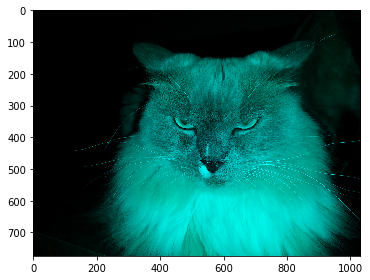

In [ ]:
# open an image from the Web and display it
image = skimage.io.imread('https://i.imgur.com/r4RLyz0.jpg')
skimage.io.imshow(image)
plt.show()

In [ ]:
# execute this cell to apply the noRed filter to the kitty
newImage = pixelMapper(image, noRed)
skimage.io.imshow(newImage)
plt.show()

##3. No Shades of Gray

Now, create a filter that will create an image that is *ONLY* black and white. Start with code that is similar to the `grayPixel()` function from Section 6.3.2 of your text. Then, instead of setting the average intensity as the red, green, and blue intensities of the new pixel, do the following: if the average is greater than or equal to 128, set the new pixel to all white; otherwise set the new pixel to black. 

*Hint*: remember to convert each of the `oldPixel` intensities to an integer using the `int()` function. 

If your filter works, you should see something like this:

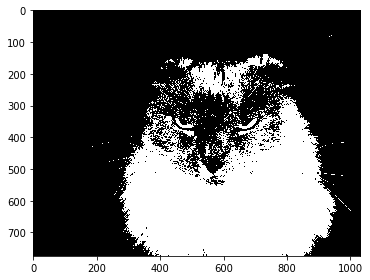

In [ ]:
# TODO: complete this function
def blackAndWhite(oldPixel):
  """
  Convert a pixel to black and white.

  parameters
  ----------
  oldPixel : 1x3 uint8 NumPy array
    Red, green, blue pixel intensities of the pixel

  returns
  -------
    New copy of oldPixel, but black and white instead of color
  """


In [ ]:
# execute this cell to apply the blackAndWhite filter to the kitty
newImage = pixelMapper(image, blackAndWhite)
skimage.io.imshow(newImage)
plt.show()

##4. Sepia Tone

Finally, create a sepia tone filter to create an old-timey fell to an image. Given the R, G, and B values of `oldPixel`, the color intensities of the new pixel are:

```
newR = (R * 0.393 + G * 0.769 + B * 0.189)
newG = (R * 0.349 + G * 0.686 + B * 0.168)
newB = (R * 0.272 + G * 0.534 + B * 0.131)
```

Again, you will need to convert the `oldPixel` intensities to integers before doing the math.

*Hint*: remember that each color intesity must be an integer in the range [0, 255]. You will have to make sure the new channel values are appropriate before making the new pixel.

If your filter works, the output will look like this:

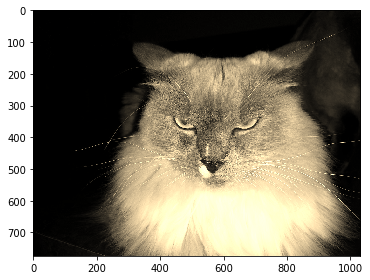

In [ ]:
# TODO: complete this function
def sepia(oldPixel):
  """
  Make a sepia-toned version of a pixel

  parameters
  ----------
  oldPixel : 1x3 uint8 NumPy array
    Red, green, blue pixel intensities of the pixel

  returns
  -------
    New copy of oldPixel, but sepia-toned instead of full color.
  """


In [ ]:
# execute this cell to apply the sepia filter to the kitty
newImage = pixelMapper(image, sepia)
skimage.io.imshow(newImage)
plt.show()